In [1]:
import set_jupyter_env
from apiServer import *
import pandas as pd 

In [2]:
API = ApiServer()

In [3]:
API.help()


__________NERLNET CHECKLIST__________
Nerlnet configuration files are located at config directory.
Make sure data and jsons in correct folder, and jsons include the correct paths
* Data includes: a single csv that includes all the data for the experiment (training and prediction phases)
* Jsons include: - distributed configuration (dc_<name>.json)
                 - connection map (conn_<name>.json)
                 - experiment flow (exp_<name>.json)
* Jsons directory: can be defined by changing the config file: config/jsonsDir.nerlconfig

____________API COMMANDS_____________
==========Setting experiment========

-showJsons():                                           lists available json files in jsons directory (dc, conn, exp) to be used with setJsons and getUserJsons
-list_datasets():                                       reads `hf_repo_ids.json` and list of datasets and files of Nerlnet organizaion on https://huggingface.co/Nerlnet
-download_dataset(idx, dir):                   

In [4]:
API.showJsons()


Distributed Configuration Files
--------------------

0.	dc_eeg_4d_4w_2c_4s_2r.json
1.	dc_synt_8d_8w_2c_4s_4r.json
2.	dc_synt_8d_8w_4c_6r_4s.json
3.	dc_synt_distributed_w5_c3_6r_3s_3d.json
4.	dc_test_synt_1d_2c_1s_4r_4w.json
5.	dc_test_synt_1d_2c_2s_4r_4w.json

Connection Map Files
--------------------

0.	conn_1Router1Client1S.json
1.	conn_1Router1Client2S.json
2.	conn_1Router2Clients1S.json
3.	conn_1Router3Clients1S.json
4.	conn_1Router4Clients1S.json
5.	conn_1Router4Clients1fed.json
6.	conn_1Router4Clients2Sources.json
7.	conn_1Router4Clients2Sources1fed.json
8.	conn_2R4C1S_health_david.json
9.	conn_2Router2Clients1Source.json
10.	conn_2Router2Clients1Source_david.json
11.	conn_2Router2Clients2Source.json
12.	conn_2Router2ClientsGUI.json
13.	conn_2Router3Clients.json
14.	conn_3Router3Clients.json
15.	conn_6RouterCycle6Clients1Source.json
16.	conn_6RouterCycle8Clients1Source.json
17.	conn_6RouterLine6Clients1Source.json
18.	conn_8RouterCycle8Clients1Source.json
19.	conn_eeg_4d_4w_2c

In [5]:
dc = 0
conn = 19
exp = 0
API.setJsons(dc , conn , exp)

In [6]:
dc_path , conn_path , exp_path = API.getUserJsons()

In [7]:
API.list_datasets()

[INFO][2024-05-22 12:49:11,291] 0. Nerlnet/skab: ['skab_full.csv']
[INFO][2024-05-22 12:49:11,292] 1. Nerlnet/MNist: []
[INFO][2024-05-22 12:49:11,292] 2. Nerlnet/synthetic_norm: ['synthetic_full.csv']
[INFO][2024-05-22 12:49:11,295] 3. Nerlnet/EEG_Eye_State_Classification: ['EEG_Eye_State_Classification.csv']


In [8]:
API.add_repo_to_datasets_list("Nerlnet/EEG_Eye_State_Classification", "EEG_eye_state_classification_Ohad", "2 class of classification")

Repository Nerlnet/EEG_Eye_State_Classification already exists in the hf_repo_ids.json


In [9]:
API.download_dataset(3)

Fetching 3 files:   0%|          | 0/3 [00:00<?, ?it/s]

[INFO][2024-05-22 12:49:12,130] Files downloaded to /tmp/nerlnet/data/NerlnetData-master/nerlnet/EEG_eye_state_classification_Ohad


In [10]:
exp_name = "EEG_Eye_State_Classification"
API.initialization(exp_name, dc_path, conn_path, exp_path)

[INFO][2024-05-22 12:49:12,997] 
Network components:
                 Receiver's Address: http://10.0.0.11:8901
                 Frequency: 300 [batches/sec]
                 Batchsize: 100 [samples]
                 devicesIp: ['10.0.0.11', '10.0.0.7', '10.0.0.10', '10.0.0.8', '10.0.0.12']
                 mainServerIp: 10.0.0.11
                 mainServerPort: 8900
                 apiServerIp: 10.0.0.11
                 apiServerPort: 8901
                 Clients: ['c1', 'c2']
                 Workers: ['w1', 'w2', 'w3', 'w4']
                 Sources: ['s1', 's2', 's3', 's4']
                 Routers: ['r1', 'r2']
[INFO][2024-05-22 12:49:12,998] Connections:
[INFO][2024-05-22 12:49:12,998] 		 r1 : ['mainServer', 'c1', 'r2', 's2', 's1']
[INFO][2024-05-22 12:49:12,999] 		 r2 : ['r1', 'c2', 's3', 's4']
[INFO][2024-05-22 12:49:12,999] Experiment name: EEG_Eye_State_Classification
[INFO][2024-05-22 12:49:13,000] Batch size: 100
[INFO][2024-05-22 12:49:13,000] Number of features: 14
[I

 * Serving Flask app 'receiver'
 * Debug mode: off


[INFO][2024-05-22 12:49:15,051] *** Remember to execute NerlnetRun.sh on each device before running the experiment! ***


In [11]:
API.send_jsons_to_devices()

[INFO][2024-05-22 12:49:15,495] Sending distributed configurations to devices is completed


In [12]:
API.run_current_experiment_phase()

[INFO][2024-05-22 12:49:15,500] Experiment phase: training_phase of type training starts running...
[INFO][2024-05-22 12:49:15,503] Sending data to sources
[INFO][2024-05-22 12:49:17,939] Data is ready in sources
[INFO][2024-05-22 12:49:17,940] Phase training requested from Main Server
[INFO][2024-05-22 12:49:34,234] Processing experiment phase data
[INFO][2024-05-22 12:49:34,238] Processing experiment phase data completed
[INFO][2024-05-22 12:49:34,239] Start generating communication statistics for training_phase of type training
[INFO][2024-05-22 12:49:34,240] Statistics requested from Main Server
[INFO][2024-05-22 12:49:34,695] Statistics received from Main Server
[INFO][2024-05-22 12:49:34,696] Phase of training_phase training completed


In [13]:
stats_train1 = API.get_experiment_flow(exp_name).generate_stats()

,w4,w3,w2,w1
0,0.529213,0.763130,0.529203,0.763120
1,0.567784,0.738106,0.567781,0.740175
2,0.897346,0.634270,0.897359,0.634295
3,0.890371,0.628687,0.890376,0.628690
4,0.883471,0.623047,0.883472,0.623031
...,...,...,...,...
95,0.625854,0.853556,0.625861,0.863124
96,0.620480,0.846689,0.620485,0.856191
97,0.615137,0.839858,0.615141,0.849298
98,0.609825,0.833063,0.609828,0.842442


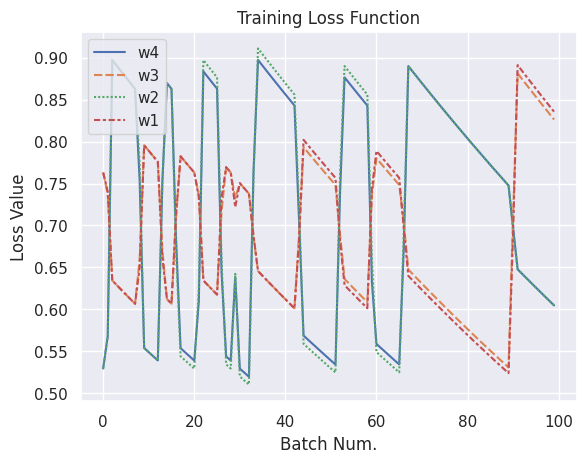

In [14]:
stats_train1.get_loss_ts(plot=True)

In [15]:
API.next_experiment_phase()
API.run_current_experiment_phase()

[INFO][2024-05-22 12:50:56,726] Experiment phase: prediction_phase of type prediction starts running...
[INFO][2024-05-22 12:50:56,727] Sending data to sources
[INFO][2024-05-22 12:50:57,668] Data is ready in sources
[INFO][2024-05-22 12:50:57,669] Phase prediction requested from Main Server
[INFO][2024-05-22 12:51:04,840] Processing experiment phase data
[INFO][2024-05-22 12:51:04,844] Processing experiment phase data completed
[INFO][2024-05-22 12:51:04,844] Start generating communication statistics for prediction_phase of type prediction
[INFO][2024-05-22 12:51:04,846] Statistics requested from Main Server
[INFO][2024-05-22 12:51:05,300] Statistics received from Main Server
[INFO][2024-05-22 12:51:05,301] Phase of prediction_phase prediction completed


In [16]:
stats_predict = API.get_experiment_flow(exp_name).generate_stats()

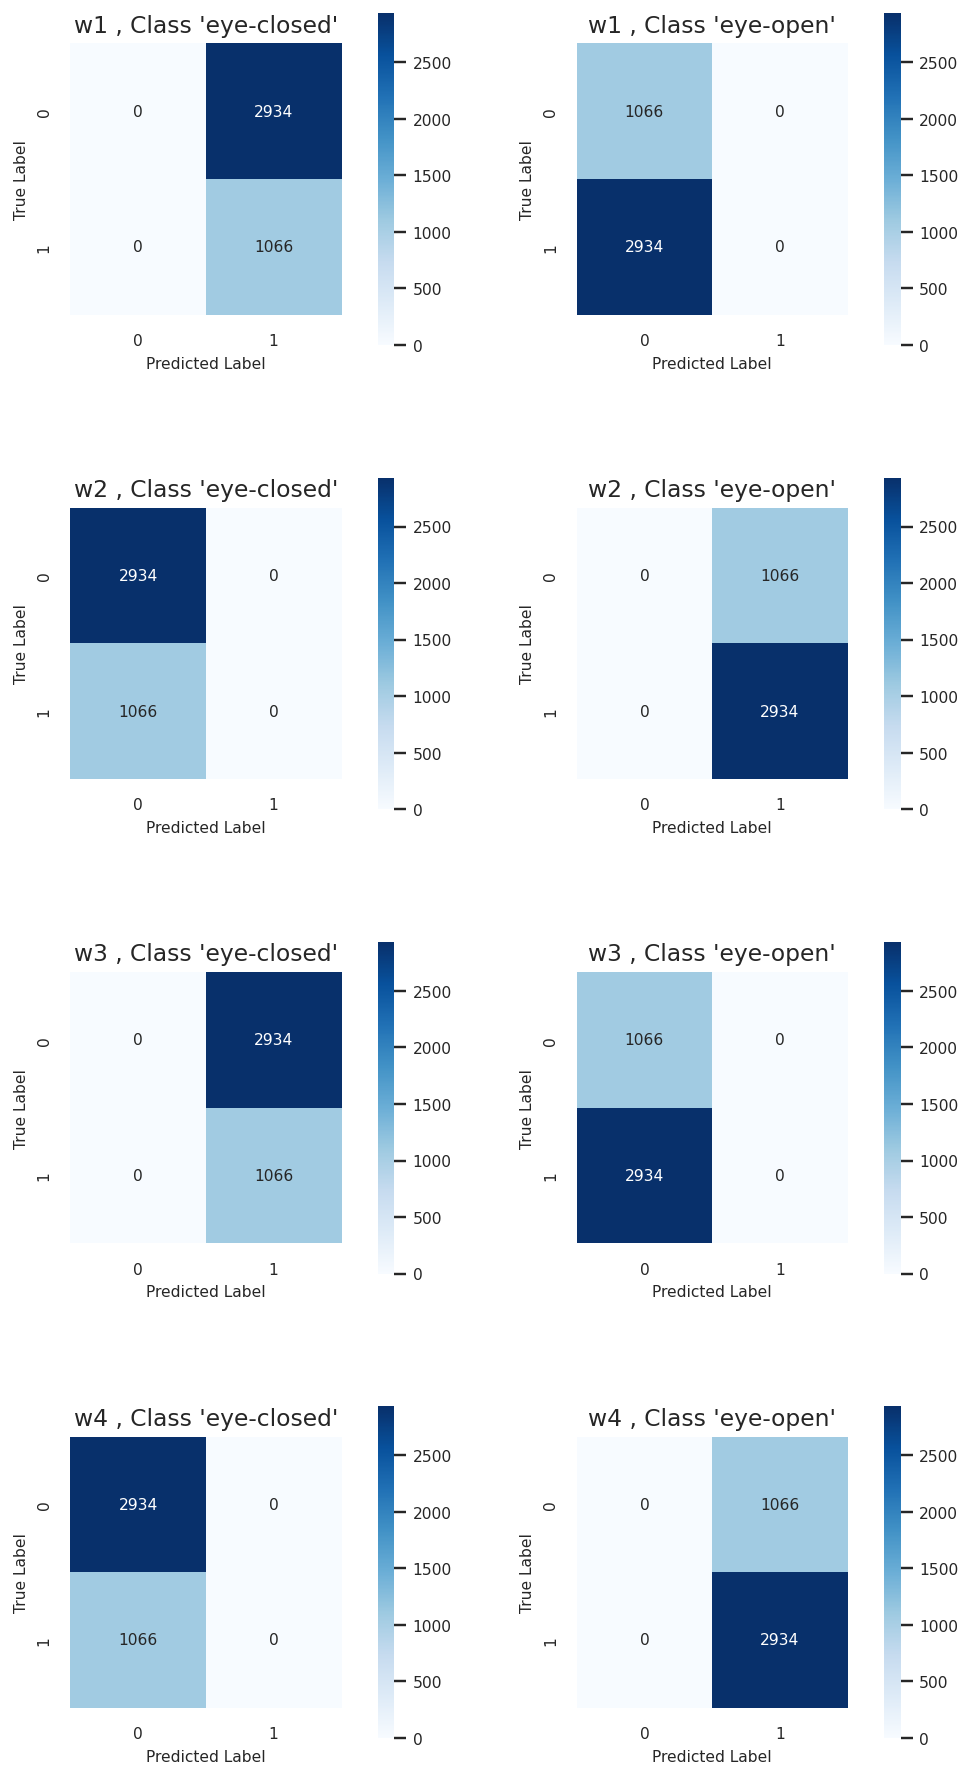

In [17]:
conf_mats_sources_workers , conf_mats_workers = stats_predict.get_confusion_matrices(plot=True)